In [41]:
import numpy as np 
import torch
from discrete_network.network import KNNet, KNNetParameters, KNNetState
from discrete_network.method.force_method import  ForceParameters, ForceLearn
from discrete_network.device import device
import matplotlib.pyplot as plt
#device = torch.device('cpu')
print(f'Device = {device.type}')



Device = cuda


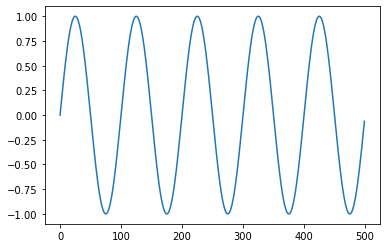

In [42]:
imin = 0; icrit =20000; nt = 21000; dt = 0.001
f_out = (np.sin(20 * np.pi * np.arange(0, nt) * dt)) 
%matplotlib inline
plt.figure()
plt.plot(f_out[0:500])
plt.show()
plt.close()

In [43]:
input_size = 0
hidden_size = 2000
output_size = 1
eps_m = .015
delta_eps = 0.008
a = .25
eps = -delta_eps + 2 * delta_eps * torch.rand(hidden_size, 1).to(device) + eps_m
J = (1 + a - torch.sqrt(1 + a * a - a + 3 * eps)) / 3
J = J.to(device)
KNNetParameters(eps=eps, J=J)


x_initial = 0.6 * torch.rand(hidden_size, 1).to(device)
y_initial = torch.zeros(hidden_size, 1).to(device)
z_initial = torch.zeros(hidden_size, 1).to(device)
ISPC_initial = torch.zeros(hidden_size, 1).to(device)
initial_state = KNNetState(x=x_initial, y=y_initial, z=z_initial, ISPC=ISPC_initial)
net = KNNet(input_size, hidden_size, output_size)
net.to_device(device)
lp = ForceParameters(stop_learning=icrit, start_learning=imin)
fl = ForceLearn(net=net, lp=lp, save_states=True)


In [44]:
f_out = f_out.reshape((f_out.shape[0], 1))
print(f'f_out.shape = {f_out.shape}')

f_out.shape = (21000, 1)


In [45]:
train_logs, states = fl.train(target_outputs=f_out, state=initial_state)

 18%|█▊        | 3691/21000 [00:05<00:27, 635.42it/s]


KeyboardInterrupt: 

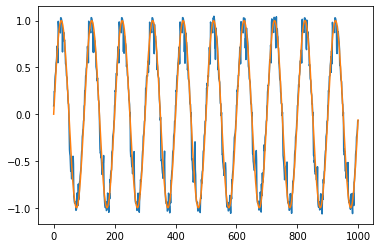

In [32]:
plt.plot(train_logs.numpy()[-1000:, 0, 0])
plt.plot(f_out[-1000:, 0])

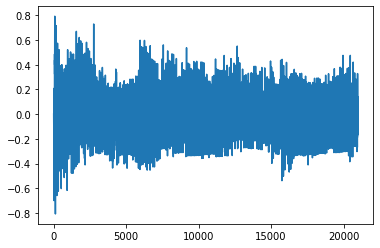

In [33]:
plt.plot((train_logs.numpy()[:, 0, 0] - f_out[:, 0]))

In [34]:

x = []
y = []
for i in range(len(states)):
    x.append(states[i].x)
    y.append(states[i].y)
x = torch.stack(x)
y = torch.stack(y)

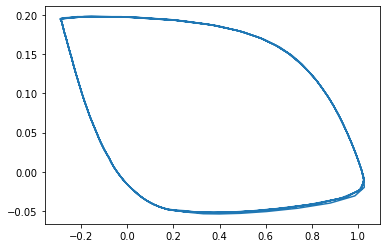

In [35]:
plt.plot(x.numpy()[-500:, 5], y.numpy()[-500:, 5])

In [36]:
from discrete_network.pca.pca import PCA
x = x.reshape(*x.shape[0:2])

pca = PCA(3)
pca_x = pca.decompose(x[-1000:])

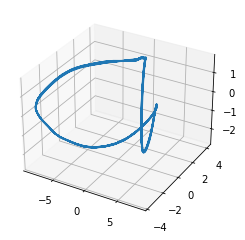

In [37]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.plot(pca_x.numpy()[:, 0], pca_x.numpy()[:, 1], pca_x.numpy()[:, 2])